In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/marki/Desktop/SB Data Science BC/Springboard/Capstone2/data from notebooks/df.csv')

In [3]:
df.head()

set_num set_name  year  theme_id  num_parts  set_num_len  set_name_len  \
0   001-1    Gears  1965         1         43            5             5   
1   001-1    Gears  1965         1         43            5             5   
2   001-1    Gears  1965         1         43            5             5   
3   001-1    Gears  1965         1         43            5             5   
4   001-1    Gears  1965         1         43            5             5   

  theme_name     id  part_num  color_id  quantity  color_name  \
0    Technic  24696      132a         7         4  Light Gray   
1    Technic  24696      3020        15         4       White   
2    Technic  24696     3062c        15         1       White   
3    Technic  24696  3404bc01        15         4       White   
4    Technic  24696        36         7         4  Light Gray   

                                           part_name  is_trans  \
0                      Tyre Smooth Old Style - Small         0   
1                                        Plate 2 x 4         0   
2     Brick Round 1 x 1 Solid Stud, No Bottom Groove         0   
3  Turntable 4 x 4 - Old Type Complete, Perfectly...         0   
4                      Tyre Smooth Old Style - Large         0   

   theme_name_len  part_num_len  color_name_len  part_name_len  is_ninjago  
0               7             4              10             29           0  
1               7             4               5             11           0  
2               7             5               5             46           0  
3               7             8               5             52           0  
4               7             2              10             29           0

In [4]:
df.columns

Index(['set_num', 'set_name', 'year', 'theme_id', 'num_parts', 'set_num_len',
       'set_name_len', 'theme_name', 'id', 'part_num', 'color_id', 'quantity',
       'color_name', 'part_name', 'is_trans', 'theme_name_len', 'part_num_len',
       'color_name_len', 'part_name_len', 'is_ninjago'],
      dtype='object')

In [5]:
df.shape

(919288, 20)

In [6]:
target_names = 'set_num set_name theme_id theme_name id part_num color_name part_name theme_name_len is_ninjago'.split()
target_names

['set_num',
 'set_name',
 'theme_id',
 'theme_name',
 'id',
 'part_num',
 'color_name',
 'part_name',
 'theme_name_len',
 'is_ninjago']

In [7]:
# define the dataset
fn = list()
for i, name in enumerate(df.columns):
    if i > 100:
        break
    if name in target_names:
        continue
    fn.append(name)

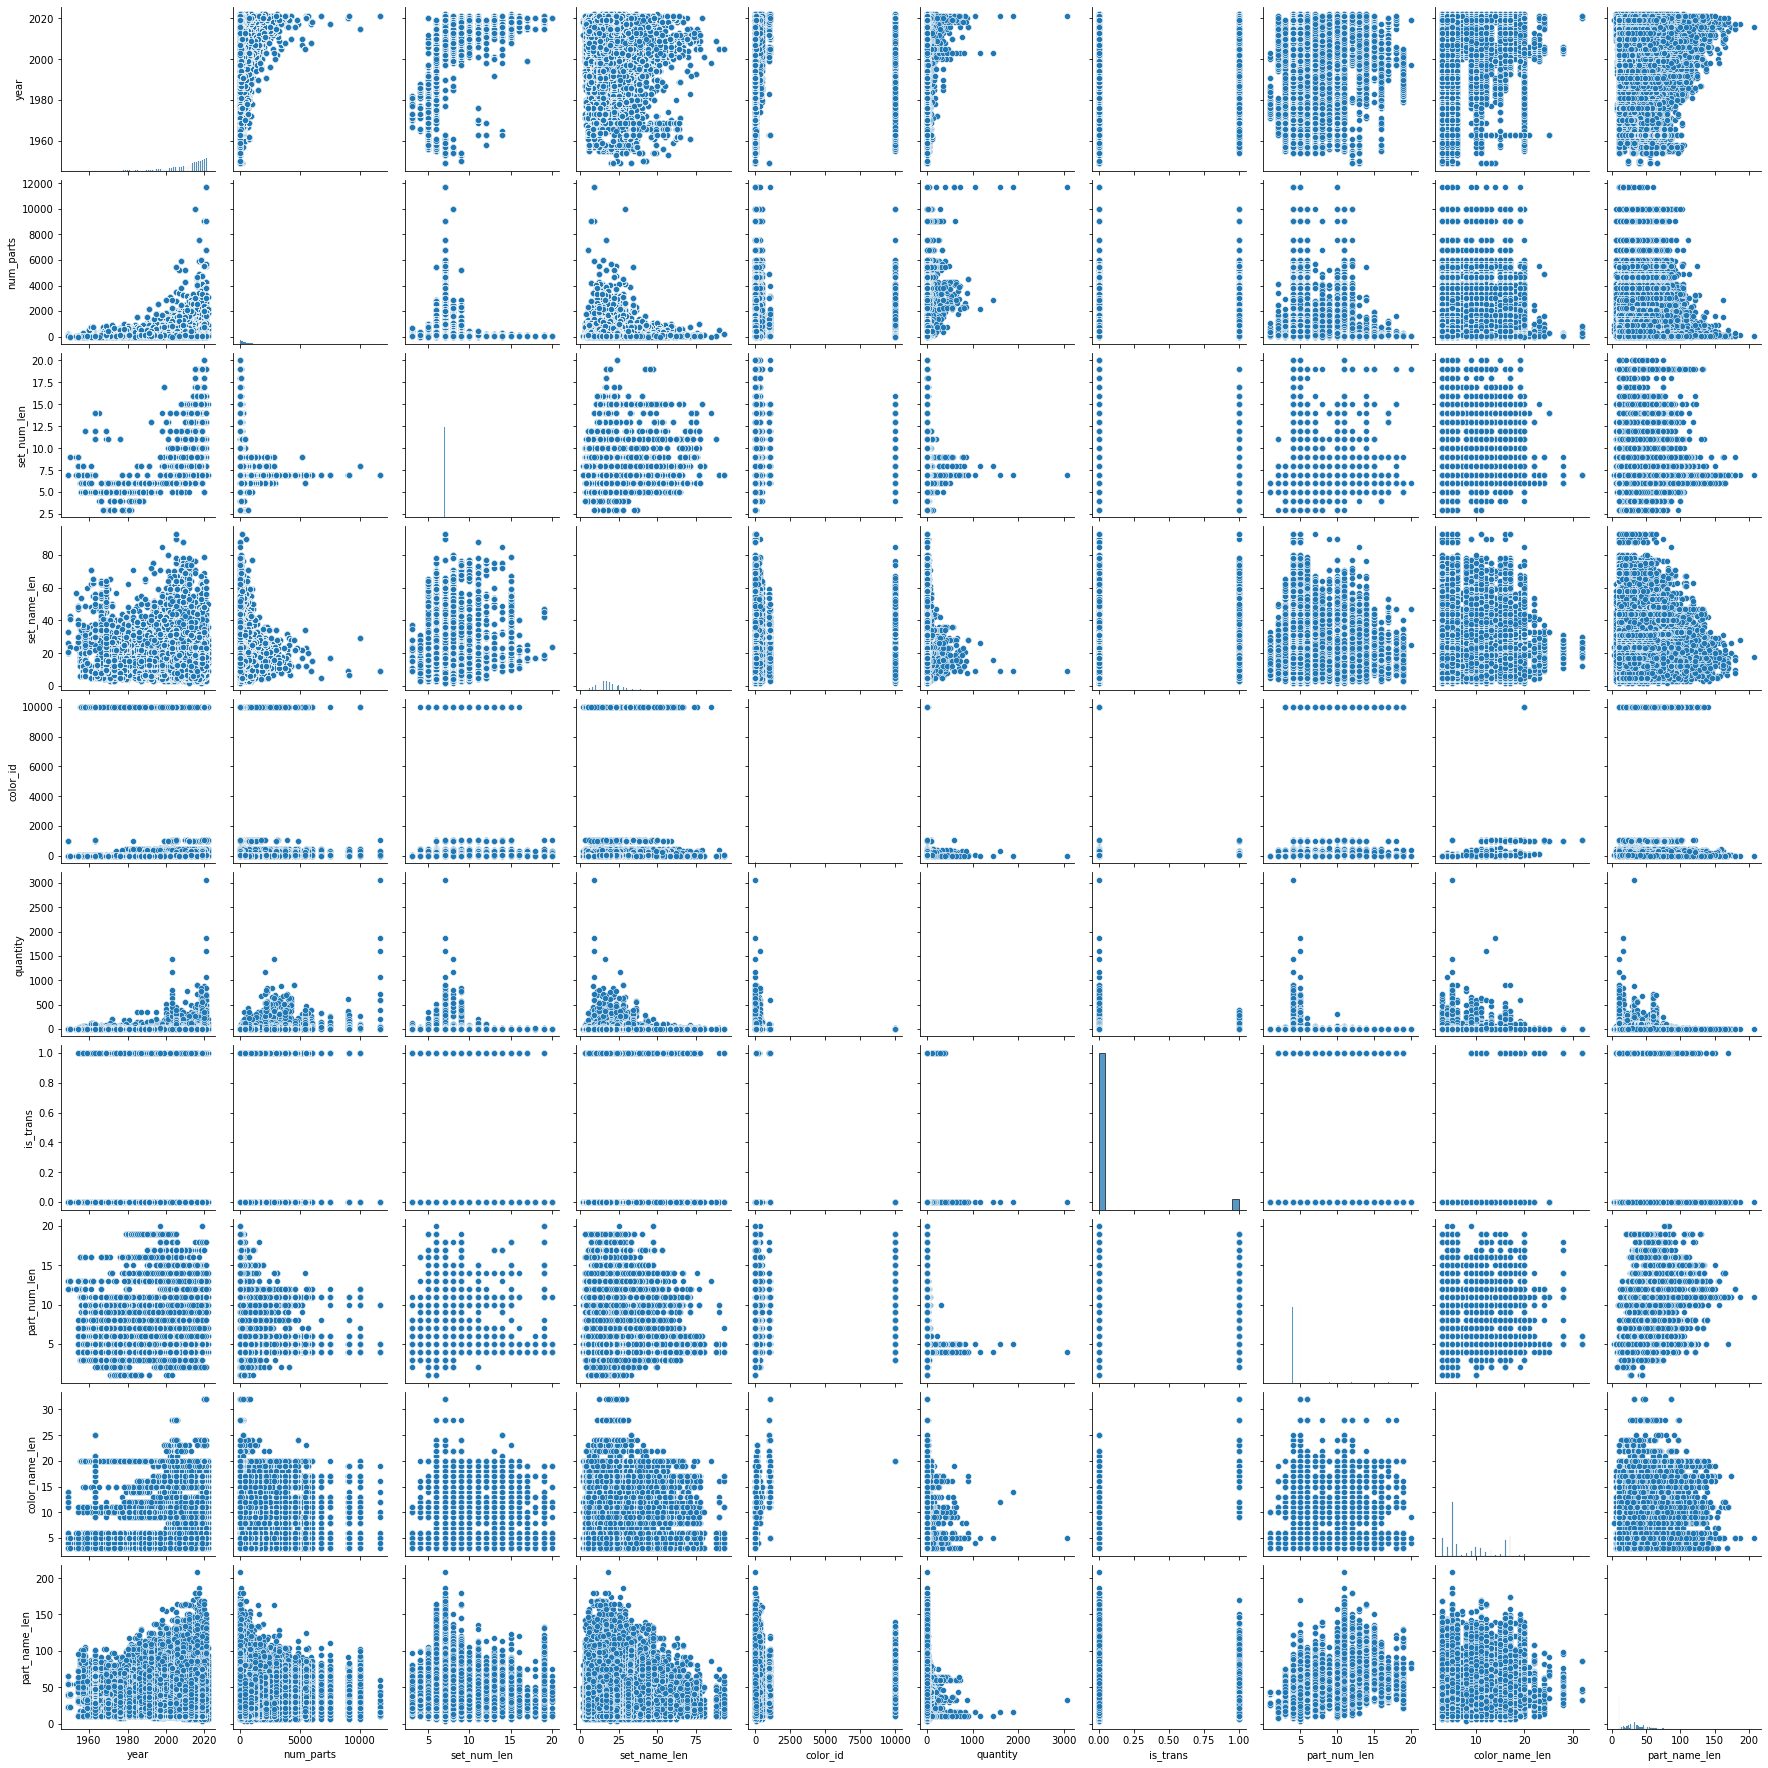

In [8]:
sns.pairplot(df[fn])

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

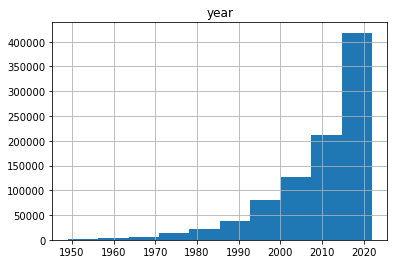

In [9]:
df.hist(column='year')

In [10]:
df['num_parts'].max()

11695

array([[<AxesSubplot:title={'center':'num_parts'}>]], dtype=object)

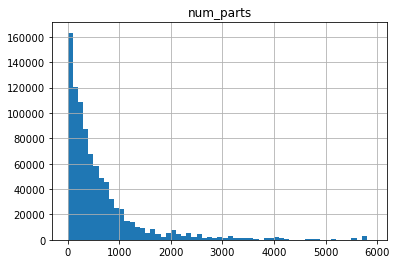

In [11]:
df.hist(column='num_parts', bins=range(0, 6000, 100))

In [12]:
df.head(1)

set_num set_name  year  theme_id  num_parts  set_num_len  set_name_len  \
0   001-1    Gears  1965         1         43            5             5   

  theme_name     id part_num  color_id  quantity  color_name  \
0    Technic  24696     132a         7         4  Light Gray   

                       part_name  is_trans  theme_name_len  part_num_len  \
0  Tyre Smooth Old Style - Small         0               7             4   

   color_name_len  part_name_len  is_ninjago  
0              10             29           0

In [13]:
df_1 = df[df['is_ninjago']==1]

In [14]:
df_0 = df[df['is_ninjago']==0]

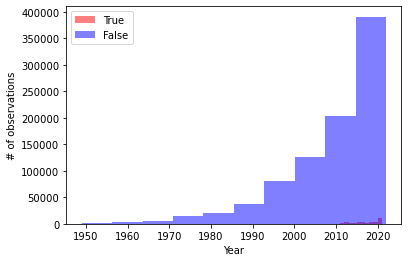

In [15]:
fig, ax = plt.subplots()
ax.hist(df_1['year'], label='True', color='red', alpha=0.5)
ax.hist(df_0['year'], label='False', color='blue', alpha=0.5)
ax.set_xlabel('Year')
ax.set_ylabel('# of observations')
ax.legend()
plt.show()

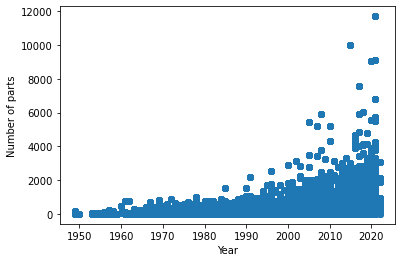

In [16]:
fig, ax = plt.subplots()
ax.scatter(df['year'], df['num_parts'])

ax.set_xlabel('Year')
ax.set_ylabel('Number of parts')
plt.show()

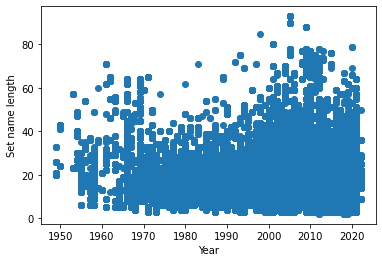

In [17]:
fig, ax = plt.subplots()
ax.scatter(df['year'], df['set_name_len'])
ax.set_xlabel('Year')
ax.set_ylabel('Set name length')
plt.show()

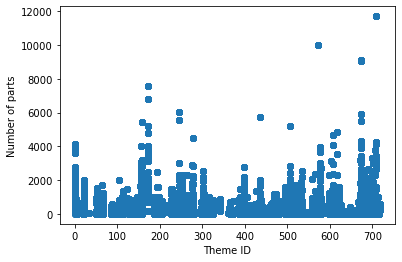

In [18]:
fig, ax = plt.subplots()
ax.scatter(df['theme_id'], df['num_parts'])
ax.set_xlabel('Theme ID')
ax.set_ylabel('Number of parts')
plt.show()

In [20]:
df.sort_values(['is_ninjago', 'num_parts'], ascending=[False, False])

set_num              set_name  year  theme_id  num_parts  \
615089   71741-1  NINJAGO City Gardens  2021       435       5709   
615090   71741-1  NINJAGO City Gardens  2021       435       5709   
615091   71741-1  NINJAGO City Gardens  2021       435       5709   
615092   71741-1  NINJAGO City Gardens  2021       435       5709   
615093   71741-1  NINJAGO City Gardens  2021       435       5709   
...          ...                   ...   ...       ...        ...   
594019  71027-17  Series 20 - Complete  2020       692          0   
594020  71027-17  Series 20 - Complete  2020       692          0   
594021  71027-17  Series 20 - Complete  2020       692          0   
594022  71027-17  Series 20 - Complete  2020       692          0   
594023  71027-17  Series 20 - Complete  2020       692          0   

        set_num_len  set_name_len             theme_name     id     part_num  \
615089            7            20                Ninjago  85198        10170   
615090            7            20                Ninjago  85198        10187   
615091            7            20                Ninjago  85198        10187   
615092            7            20                Ninjago  85198        10247   
615093            7            20                Ninjago  85198        10884   
...             ...           ...                    ...    ...          ...   
594019            8            20  Series 20 Minifigures  49629        88646   
594020            8            20  Series 20 Minifigures  49629  90391pr0003   
594021            8            20  Series 20 Minifigures  49629  93221pr0006   
594022            8            20  Series 20 Minifigures  49629        93789   
594023            8            20  Series 20 Minifigures  49629        98138   

        color_id  quantity         color_name  \
615089        84         1  Medium Dark Flesh   
615090         2         1              Green   
615091         2         4              Green   
615092        19         1                Tan   
615093        10         1       Bright Green   
...          ...       ...                ...   
594019         0        16              Black   
594020        70         1      Reddish Brown   
594021         3         1     Dark Turquoise   
594022        15         2              White   
594023        40         1        Trans-Black   

                                                part_name  is_trans  \
615089                                       Food Pretzel         0   
615090                          Weapon Bladed Claw Spread         0   
615091                          Weapon Bladed Claw Spread         0   
615092  Plate Special 2 x 2 with 1 Pin Hole [Complete ...         0   
615093  Plant, Leaves 6 x 5 Swordleaf with Clip  (thic...         0   
...                                                   ...       ...   
594019  Plate Special 3 x 4 with 1 x 4 Center Studs [P...         0   
594020  Weapon Pike / Spear Elaborate with Flat Silver...         0   
594021  Equipment Radio / Boom Box with Handle with Go...         0   
594022                       Weapon Pike / Spear Flat End         0   
594023                                   Tile Round 1 x 1         1   

        theme_name_len  part_num_len  color_name_len  part_name_len  \
615089               7             5              17             12   
615090               7             5               5             25   
615091               7             5               5             25   
615092               7             5               3             60   
615093               7             5              12             60   
...                ...           ...             ...            ...   
594019              21             5               5             51   
594020              21            11              13             50   
594021              21            11              14             59   
594022              21             5               5             28